## Exploratory Data Analysis

### 1. Import Libraries and Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('assets/telecom_customer_churn.csv')
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0      NaN           Yes                              42.39             No   
1      NaN           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4      NaN           Yes                               7.38             No   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   Total Revenue Customer Status   Churn Category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                      

### 2. Understanding the Data

Let's get an idea about the dataset we will be working on:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

Our event of interest is to try to find out if there is any factors associated with the churn of the customers. We will try to investigate the following columns in the dataset.
- Customer Status
- Churn Category
- Churn Reason

In [8]:
df.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [9]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [11]:
total_null = df.isnull().sum()
length = len(df)
percentage = (total_null/length*100).sort_values(ascending=False)
print(percentage)

Churn Reason                         73.463013
Churn Category                       73.463013
Offer                                55.047565
Internet Type                        21.666903
Unlimited Data                       21.666903
Streaming Music                      21.666903
Streaming Movies                     21.666903
Streaming TV                         21.666903
Premium Tech Support                 21.666903
Device Protection Plan               21.666903
Online Security                      21.666903
Avg Monthly GB Download              21.666903
Online Backup                        21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Contract                              0.000000
Age                                   0.000000
Customer Status                       0.000000
Total Revenue                         0.000000
Total Long Distance Charges           0.000000
Total Extra Data Charges              0.000000
Total Refunds

### Exploratory Analysis

#### Summarize the data by Churn Status:

Our variable of interest is the Status of the Churn customers. Below, we get a visual idea on the Churn Status (Whether the customer stayed, Churned or Joined) of the dataset

C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\3857866141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Status', data=df, palette='Set2', ax=ax1)


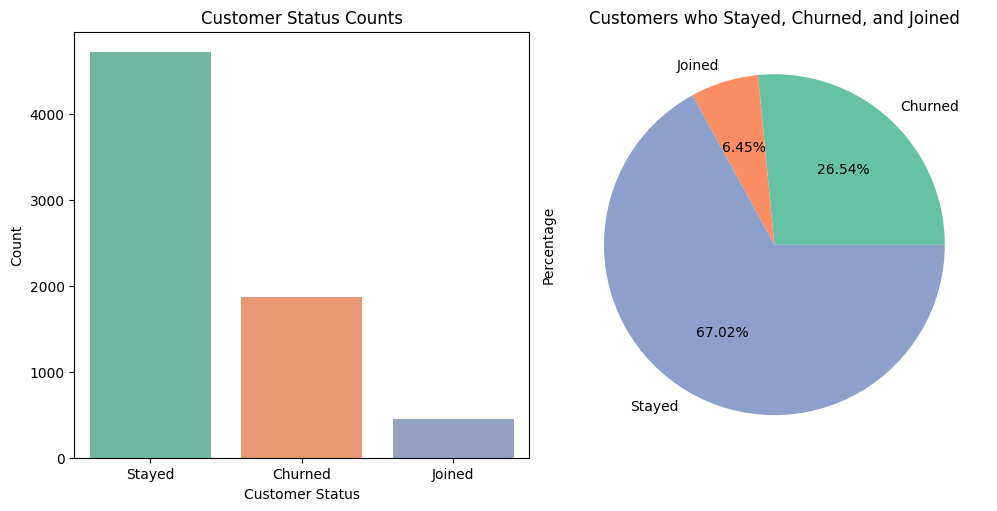

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5), constrained_layout=True)

# BarPlot
sns.countplot(x='Customer Status', data=df, palette='Set2', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Customer Status Counts')

# PieChart
df.groupby('Customer Status').size().plot(kind='pie', autopct='%.2f%%', colors=sns.color_palette('Set2'), ax=ax2)
ax2.set_ylabel('Percentage')
ax2.set_title('Customer Status Distribution')

plt.show()

**Observations:** <br>
The graphs shows that 67% of the customers stayed where 26.54% of the customers churned. As per the general telecom industry, this high rate of churn should be considered for further investigation with caution towards business profit.

#### Reasons of Churn

We can see that 26.54% of the customers churned from that company at the end of that quater. There are two other features recorded in the dataset('Churn Category' and 'Churn Reason') which related to get in depth idea on the reason for Churn.

Churn Category: The customers were asked for a specific reason for leaving the company when they wanted to leave. This column as 'Churn Reason' is directly related to Churn Category mention above.

Churn Reason: The customers were asked for a specific reason for leaving the company when they wanted to leave.

C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\3896620145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Churn Category', data=df, order=df['Churn Category'].value_counts().index, palette='Set2', ax=ax1)
C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\3896620145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index, palette='Set2', ax=ax2)


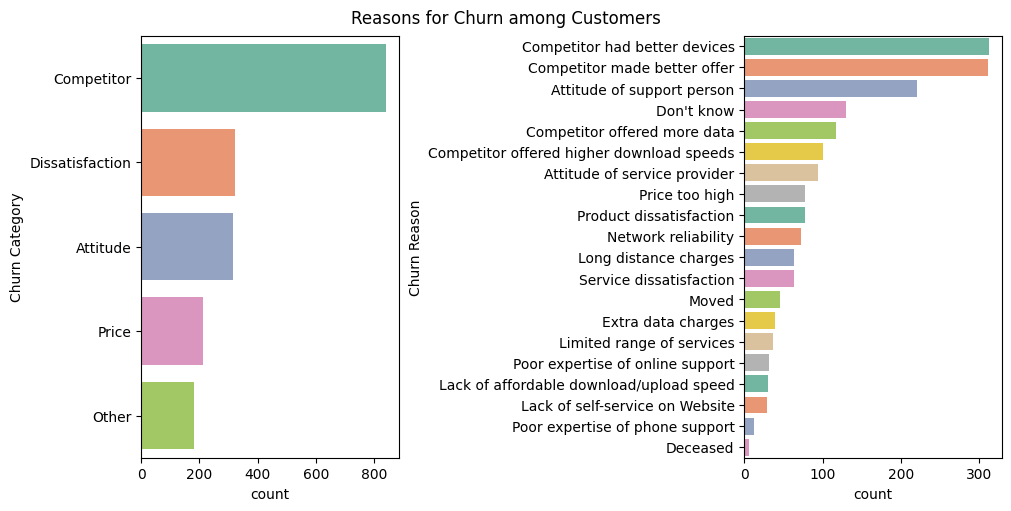

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharey=False, constrained_layout=True)
sns.countplot(y='Churn Category', data=df, order=df['Churn Category'].value_counts().index, palette='Set2', ax=ax1)
sns.countplot(y='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index, palette='Set2', ax=ax2)
plt.suptitle('Reasons for Churn among Customers')
plt.show()

**Observation:**
The reason rate for these two variables (Churn Category and Churn Reason) is 26% only, so the interpretation from this visualization is considered highly tentative.

We see that the majority churned customers left due to Competitor's offers. The second major reason is dissatisfation on the Service Provider's sevices.

From the graph above, we see that the major reason for the churn among the churned customers was the competitor's offer bein more better. The competitor's offers on service, devices, internet speed and offers with more data were the reason to churn among the majority.

The second reason of churn among customers was the churned customers were dissatisfied about the attitude of the Service Provider. This fact emphasized on to consider some effective initiatives to be taken for better customer sevice communication.

#### Summary of Categorical Variables

In this we will figure out the categorical variables.

C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\1724677272.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axs[row, col], palette='Set2')
C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\1724677272.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=7)
C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\1724677272.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, ax=axs[row, col], palette='Set2')
C:\Users\Ali Abdullah\AppData\Local\Temp\ipykernel_18644\1724677272.py:15: U

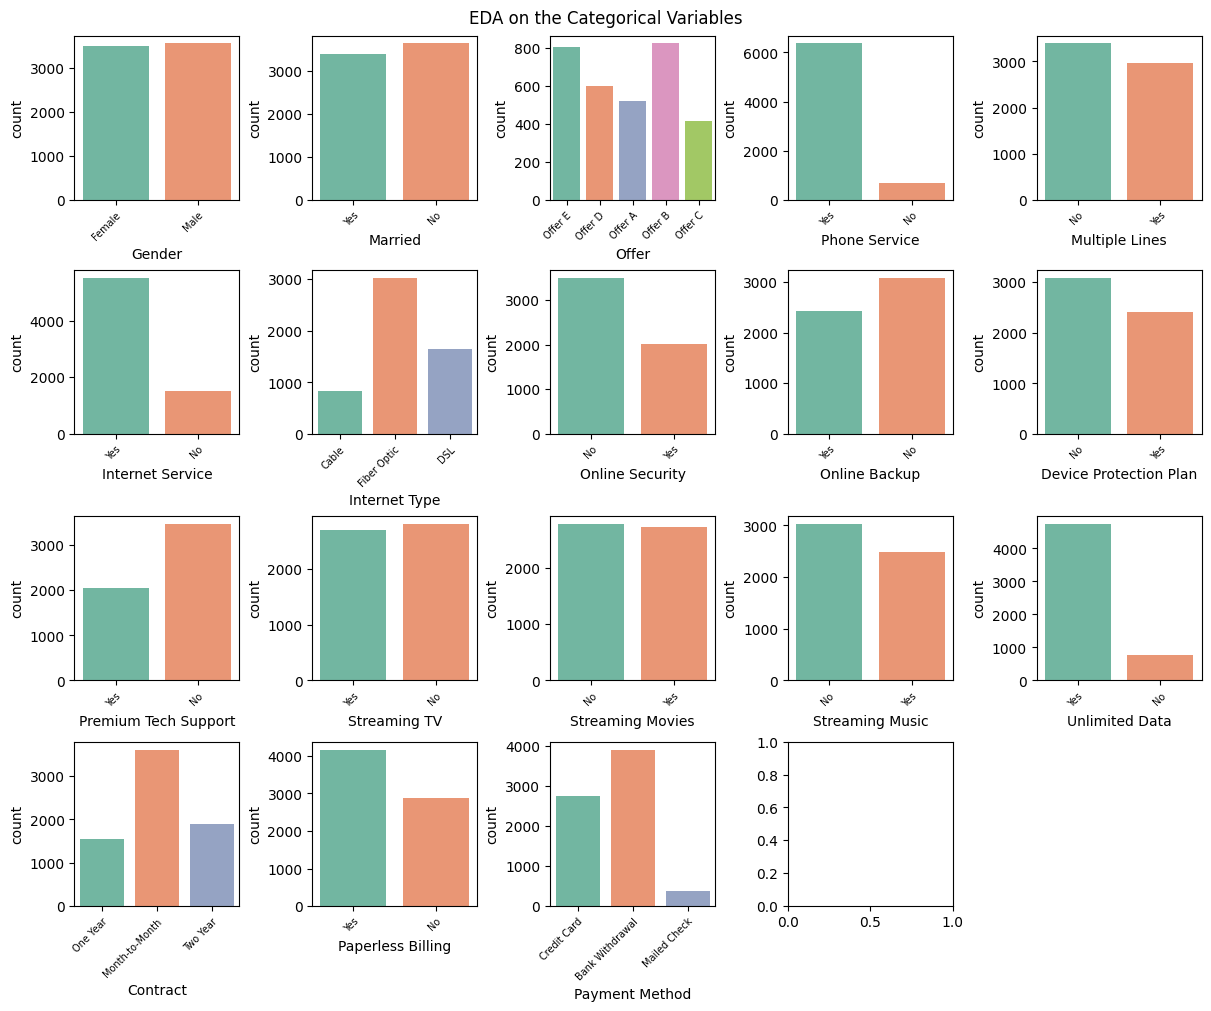

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12,10), sharey=False, constrained_layout=True)
categorical_vars = ['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 
                    'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 
                    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
                    'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 
                    'Paperless Billing', 'Payment Method']

for i, var in enumerate(categorical_vars):
    row = i // 5
    col = i % 5
    sns.countplot(x=var, data=df, ax=axs[row, col], palette='Set2')
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=7)

# Remove the empty subplots
fig.delaxes(axs[3,4])

fig.suptitle('EDA on the Categorical Variables')
plt.show()


##### Analysis by Gender

<Axes: xlabel='Gender', ylabel='count'>

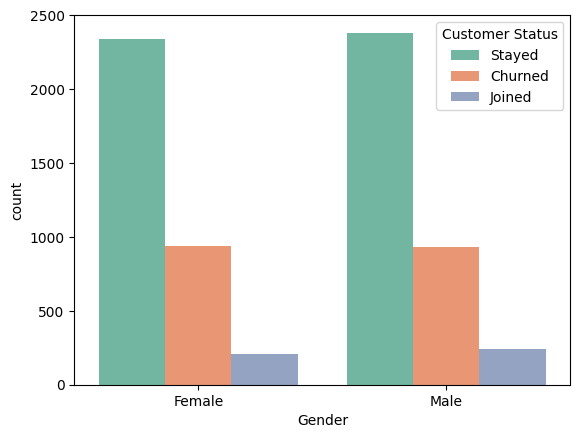

In [20]:
sns.countplot(x='Gender', data=df, hue='Customer Status', palette='Set2')

**Observation:** From the chart above, we can interprete that the dataset value for churn is well-balanced for both genders

##### Analysis by Marital Status

<Axes: xlabel='Married', ylabel='count'>

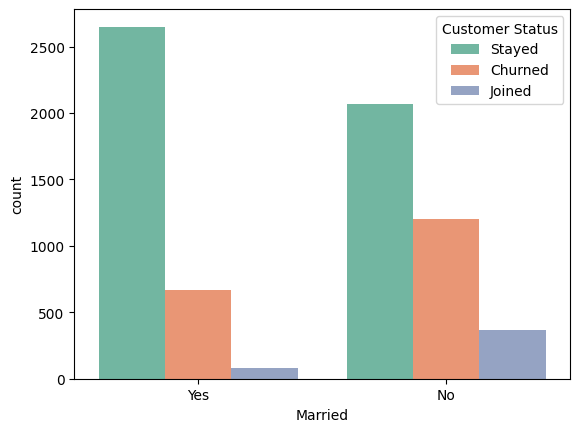

In [21]:
sns.countplot(x='Married', hue='Customer Status', data=df, palette='Set2')

**Observation:**
From the chart above, we can see that customers who churned are more likely to be unmarried.

##### Analysis by Offer

<Axes: xlabel='Offer', ylabel='count'>

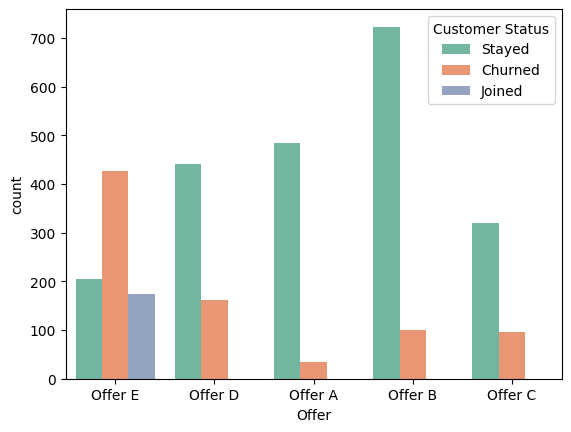

In [22]:
sns.countplot(x='Offer', hue='Customer Status', data=df, palette='Set2')

**Observation:** Offer is the variable which identifies the last marketing offer that the customers accepted. From the above chart, we can see that customers who churned are more likely to take offer E.

##### Analysis by Phone Service

<Axes: xlabel='Phone Service', ylabel='count'>

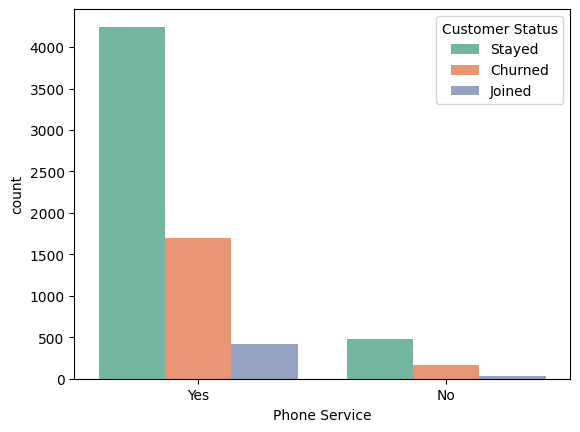

In [23]:
sns.countplot(x='Phone Service', hue='Customer Status', data=df, palette='Set2')

**Observation:** Majority of the customers had the phone service from this company and also have normal churned rate.

##### Analysis by Multiple Lines

<Axes: xlabel='Multiple Lines', ylabel='count'>

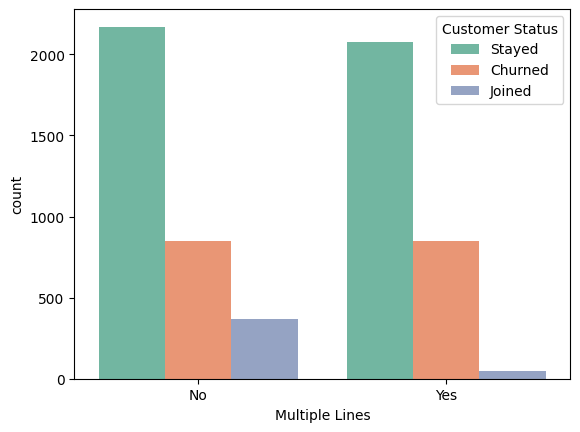

In [25]:
sns.countplot(x='Multiple Lines', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the graph above, we see that the ratio of the customer having and not having multiple lines are equal.

##### Analysis by Internet Service:

<Axes: xlabel='Internet Type', ylabel='count'>

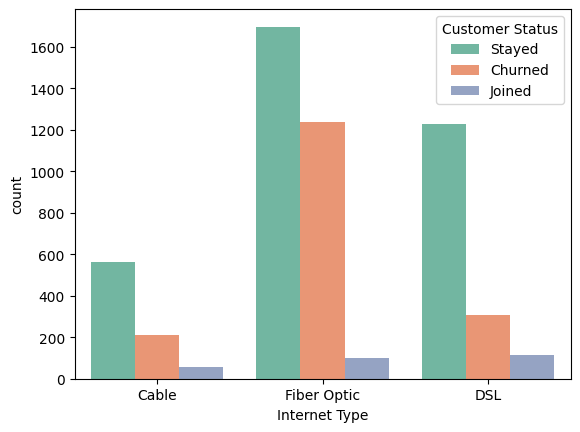

In [26]:
sns.countplot(x='Internet Type', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the above graph, we see that the fibre optics internet type is the major internet service the customers subscribed for.

##### Analysis by Online Security:

<Axes: xlabel='Online Security', ylabel='count'>

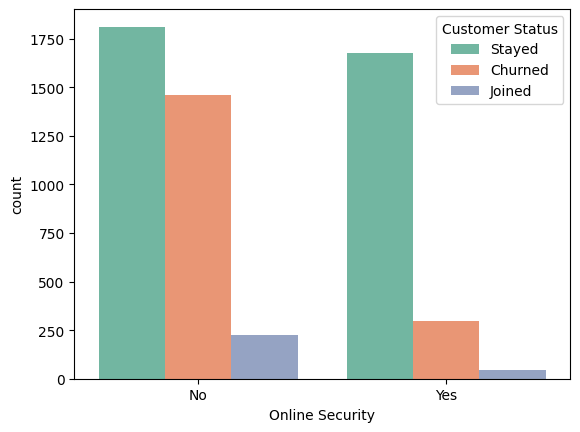

In [27]:
sns.countplot(x='Online Security', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the above graph, we see that the majority of the customers who stayed had subscribed for Online Security.

##### Analysis for Online Backup

<Axes: xlabel='Online Backup', ylabel='count'>

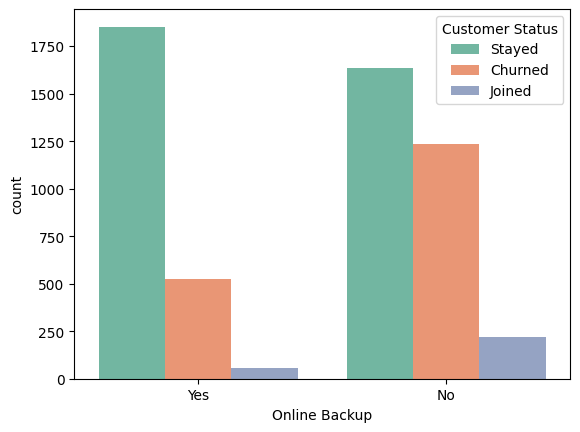

In [28]:
sns.countplot(x='Online Backup', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the above graph, we see that the majority of the customers who stayed had subscirbed for Online Backup. The majority of the customers who churned didn't had Online Backup service.

##### Analysis by Device protection plan

<Axes: xlabel='Device Protection Plan', ylabel='count'>

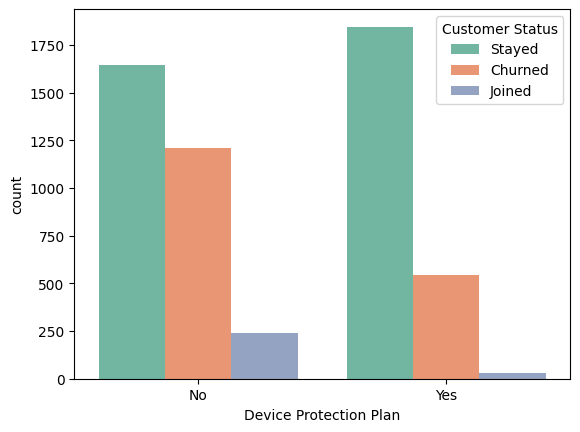

In [29]:
sns.countplot(x='Device Protection Plan', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the above graph, we see that the Device Protection Plan Service was popular among the Customers who stayed rather than those who churned.

##### Analysis by Premium Tech Support

<Axes: xlabel='Premium Tech Support', ylabel='count'>

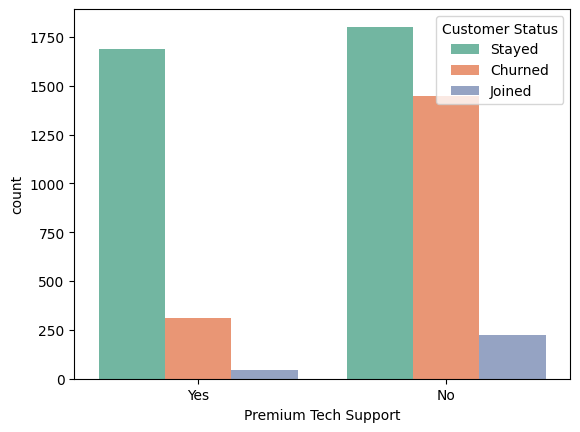

In [30]:
sns.countplot(x='Premium Tech Support', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the graph above, we see that the customer who stayed had subscribed for premium tech support compared to the churned group.

##### Analysis by Streaming TV

<Axes: xlabel='Streaming TV', ylabel='count'>

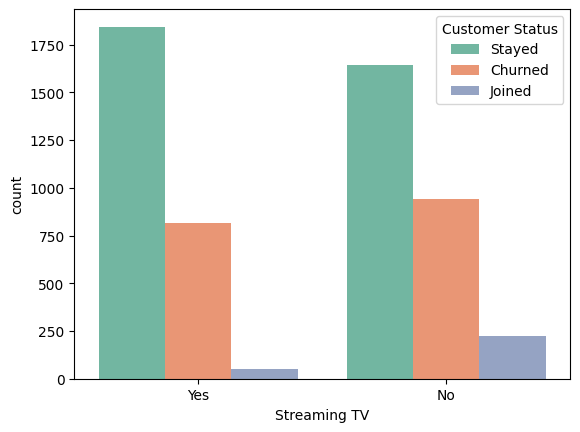

In [31]:
sns.countplot(x='Streaming TV', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the above graph, we see that the customers who stayed had subscribed for streaming TV compared to the churned group.

##### Analysis by Streaming Movies:

<Axes: xlabel='Streaming Movies', ylabel='count'>

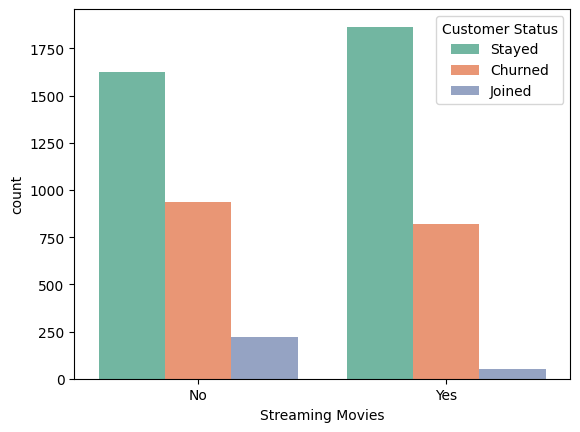

In [32]:
sns.countplot(x='Streaming Movies', hue='Customer Status', data=df, palette='Set2')

**Observation:** From the above graph, we see that the customers who stayed had subscribed for streaming movies compared to the churned group.

##### Analysis by Streaming Music

<Axes: xlabel='Streaming Music', ylabel='count'>

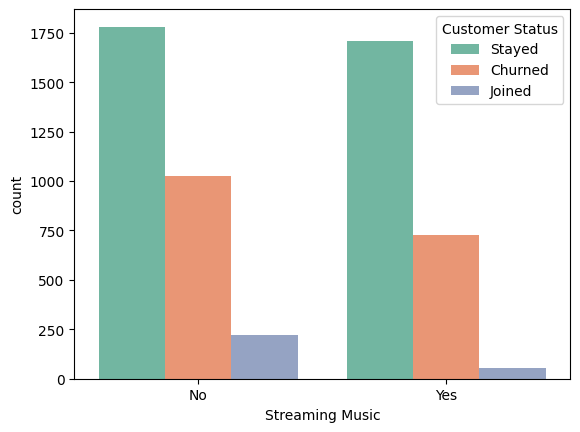

In [33]:
sns.countplot(x='Streaming Music', hue='Customer Status', data=df, palette='Set2')

##### Analysis by Unlimited Data

<Axes: xlabel='Unlimited Data', ylabel='count'>

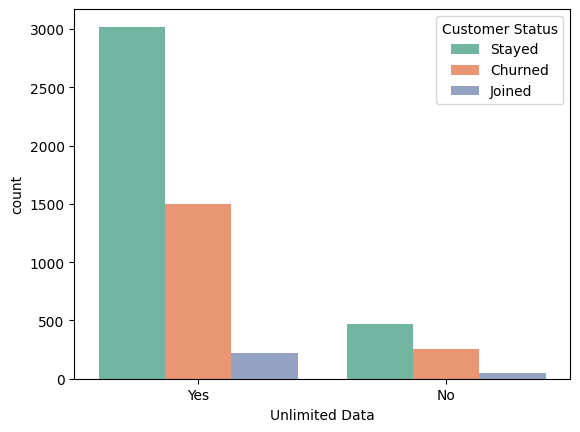

In [34]:
sns.countplot(x='Unlimited Data', hue='Customer Status', data=df, palette='Set2')

**Observation:**
From the above graph, we see that the customers who stayed and churned both of the group had subcribed for Unlimited Data Service.

##### Analysis by Contract

<Axes: xlabel='Contract', ylabel='count'>

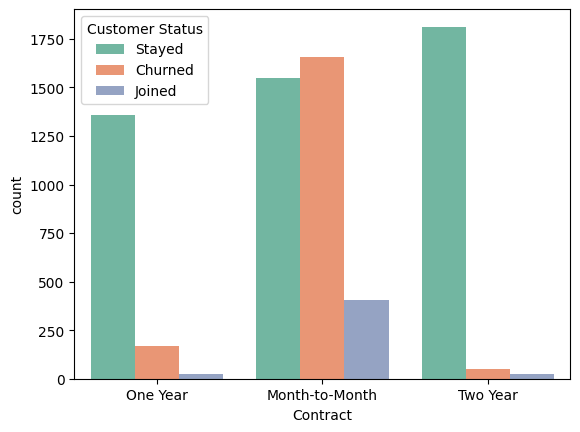

In [35]:
sns.countplot(x='Contract', hue='Customer Status', data=df, palette='Set2')

##### Analysis by Paperless Billing

<Axes: xlabel='Paperless Billing', ylabel='count'>

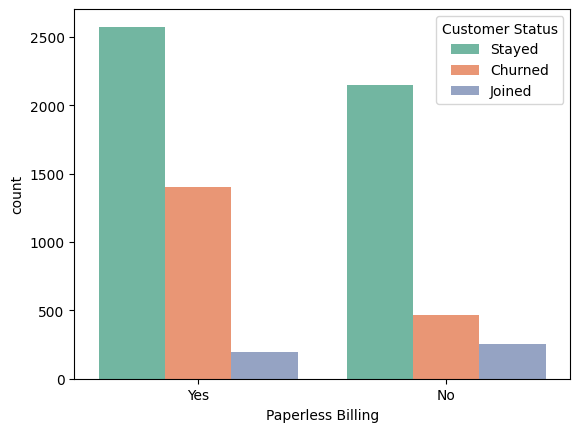

In [36]:
sns.countplot(x='Paperless Billing', hue='Customer Status', data=df, palette='Set2')

**Observation:** Paperless billing doesn't seem to differ much among the Customers who stayed, but it was popular among majority of the customers who churned.

##### Analysis by Payment Method

<Axes: xlabel='Payment Method', ylabel='count'>

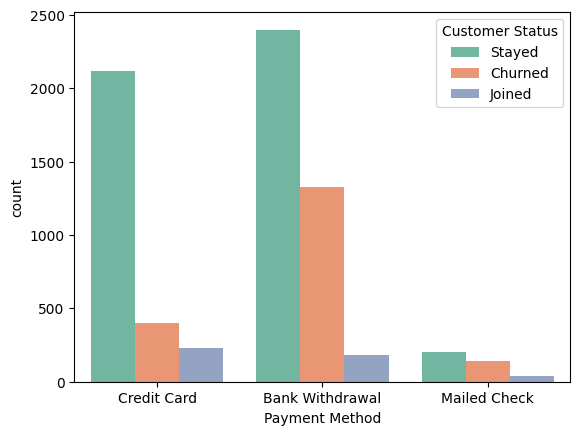

In [37]:
sns.countplot(x='Payment Method', hue='Customer Status', data=df, palette='Set2')

**Observation:** Bank withdrawal seems to be the most popular way of Bill Payment among both of the Stayed and Churned Group.

#### Summary of Numerical Variables

In [43]:
# selecting the numerical data
numerical = df.select_dtypes(exclude=[object])

In [44]:
numerical.head()

Age  Number of Dependents  Zip Code   Latitude   Longitude  \
0   37                     0     93225  34.827662 -118.999073   
1   46                     0     91206  34.162515 -118.203869   
2   50                     0     92627  33.645672 -117.922613   
3   78                     0     94553  38.014457 -122.115432   
4   75                     0     93010  34.227846 -119.079903   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    2                 9                              42.39   
1                    0                 9                              10.69   
2                    0                 4                              33.65   
3                    1                13                              27.82   
4                    3                 3                               7.38   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                     16.0            65.6         593.30           0.00   
1                     10.0            -4.0         542.40          38.33   
2                     30.0            73.9         280.85           0.00   
3                      4.0            98.0        1237.85           0.00   
4                     11.0            83.9         267.40           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
0                         0                       381.51         974.81  
1                        10                        96.21         610.28  
2                         0                       134.60         415.45  
3                         0                       361.66        1599.51  
4                         0                        22.14         289.54

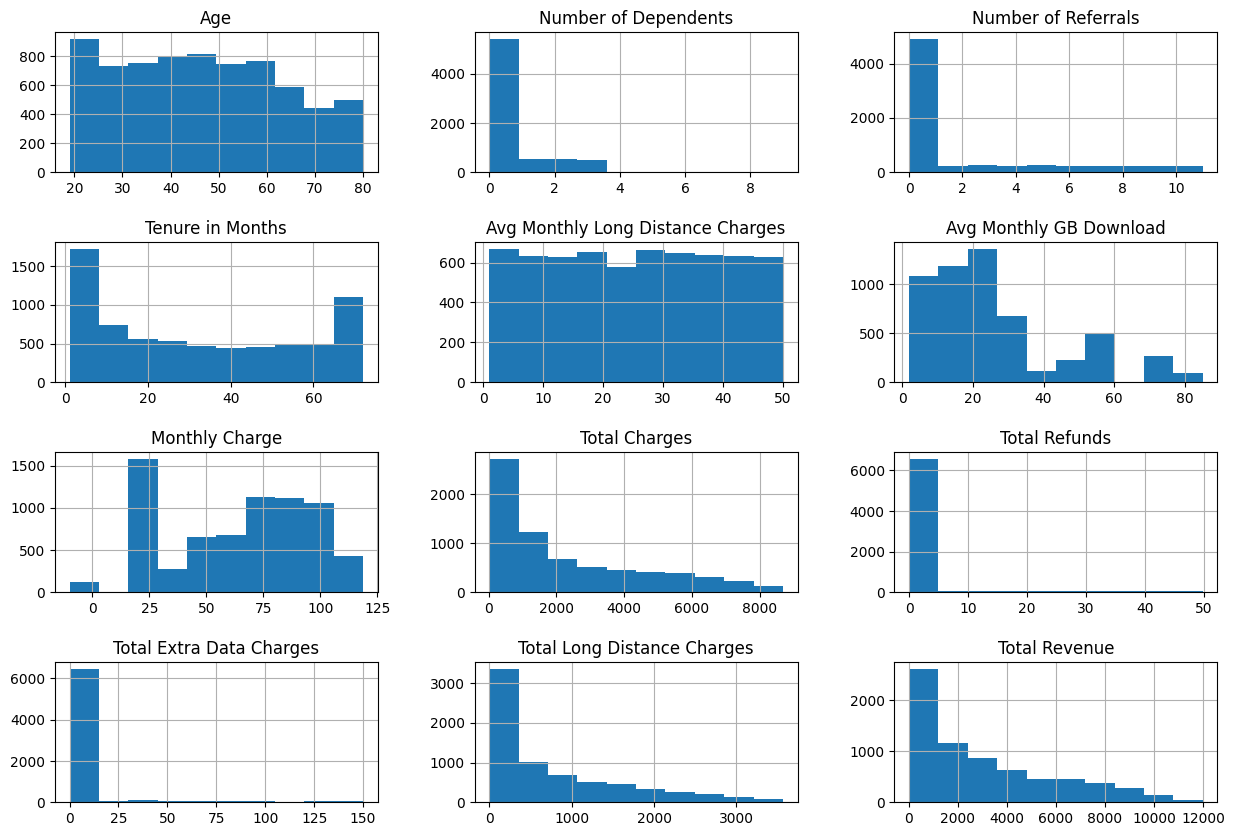

In [45]:
# let's drop some value and make a hist distribution plot
numerical.drop(['Zip Code', 'Latitude', 'Longitude'], inplace=True, axis=1)
numerical.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

##### Analysis by Age:

In [52]:
def makegraph(x, y):
    graph = sns.FacetGrid(df, col="Customer Status", hue="Customer Status", palette='Set2')
    graph.map(sns.histplot, x, kde=y).add_legend()

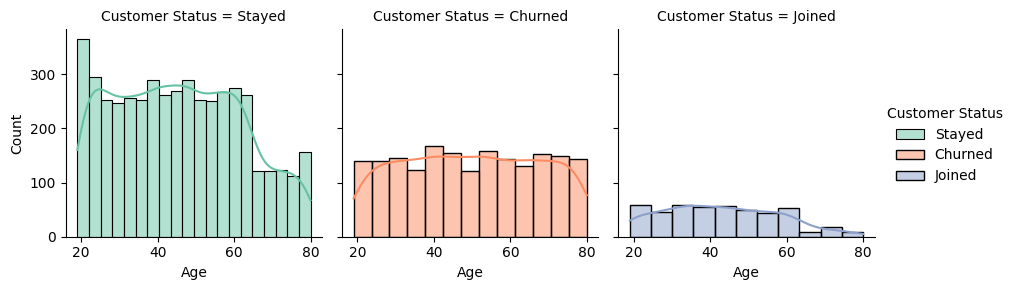

In [53]:
makegraph('Age', True)

##### Analysis by Number of Dependents

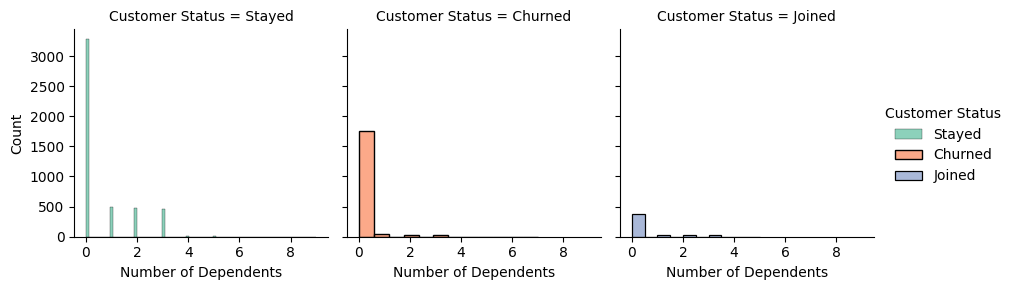

In [54]:
makegraph('Number of Dependents', False)

**Observation:** Most of the customers don't have any dependents

##### Analysis by Number of Referrals

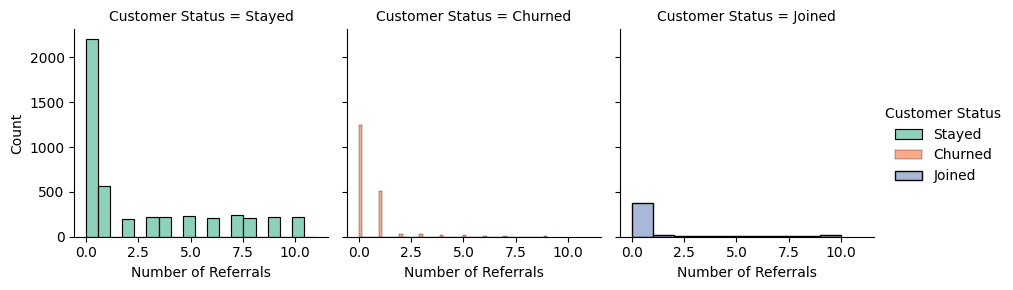

In [55]:
makegraph('Number of Referrals', False)

##### Analysis by Tenure in Months

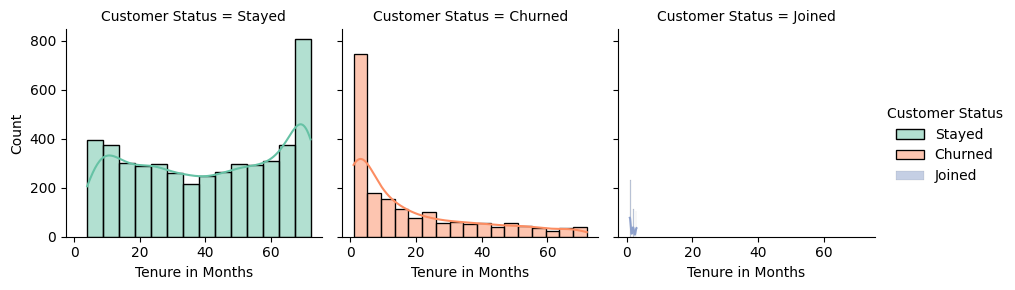

In [56]:
makegraph('Tenure in Months', True)

**Observation:** The customers who stayed with company had maximum tenure for more than 70 months, but those who churned on the first month mostly.

##### Analysis by Avg Monthly Long Distance Charges

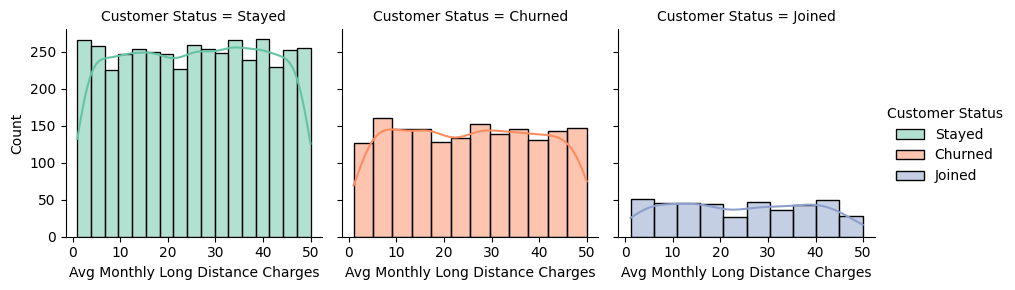

In [57]:
makegraph('Avg Monthly Long Distance Charges', True)

**Observation:** Customers who stayed were those who had maximum Average Monthly Long Distance charges than those who churned.

##### Analysis by Avg Monthly GB Download

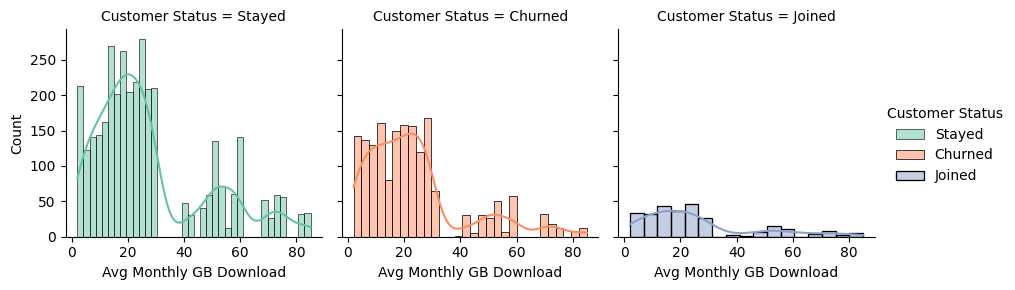

In [58]:
makegraph('Avg Monthly GB Download', True)

**Observation:** All the groups had close to 30GB average monthly download service from the service provider.

##### Analysis by Monthly Charge

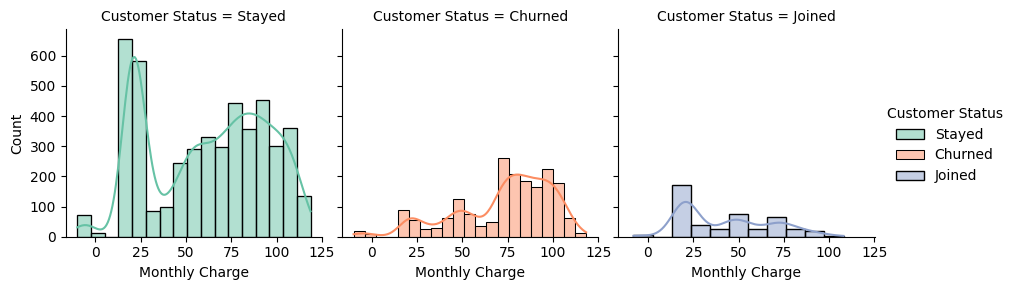

In [59]:
makegraph('Monthly Charge', True)

**Observation:** Customers who stayed payed more monthly than those who churned.

##### Analysis by Total Charges

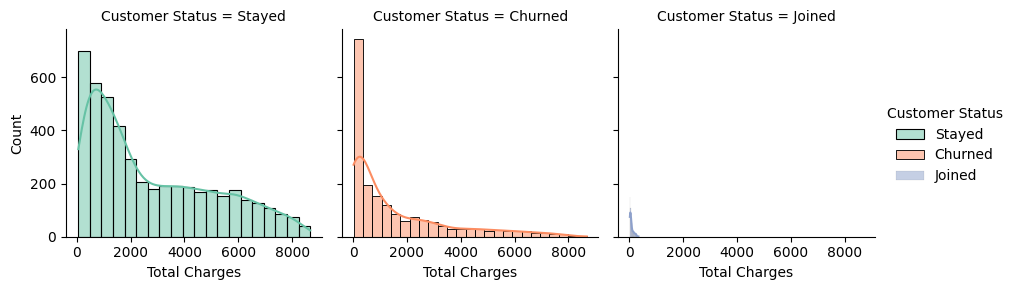

In [60]:
makegraph('Total Charges', True)

**Observation:** Customers who stayed payed more in Total then those who churned

##### Analysis by Total Refunds

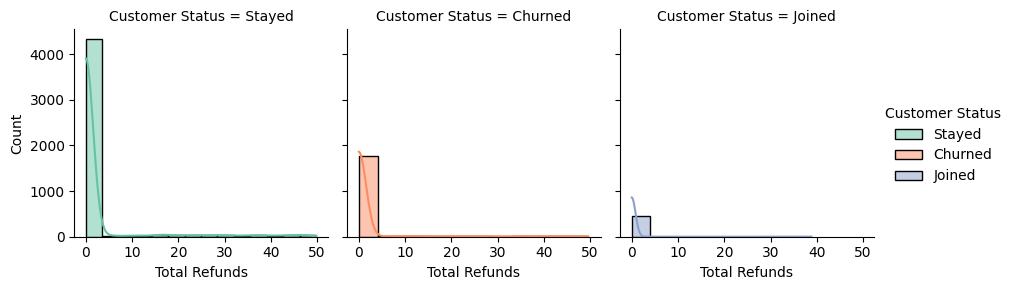

In [61]:
makegraph('Total Refunds', True)

**Observation:** None of group were offered refund

##### Analysis by Total Extra Data Charges

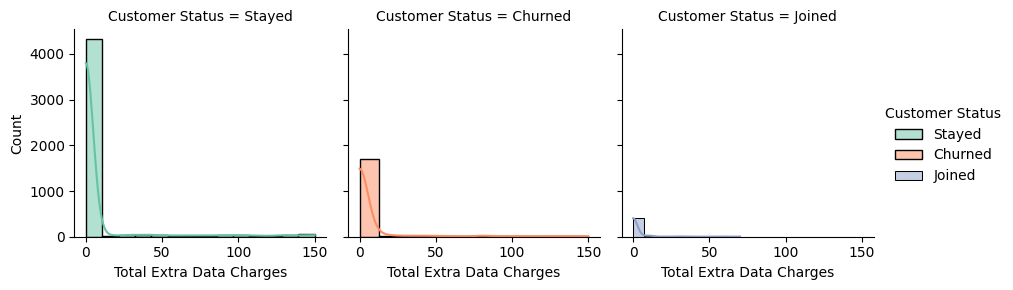

In [62]:
makegraph('Total Extra Data Charges', True)

**Observation:** None of the groups had been charged extra data

##### Analysis by Total Long Distance Charges

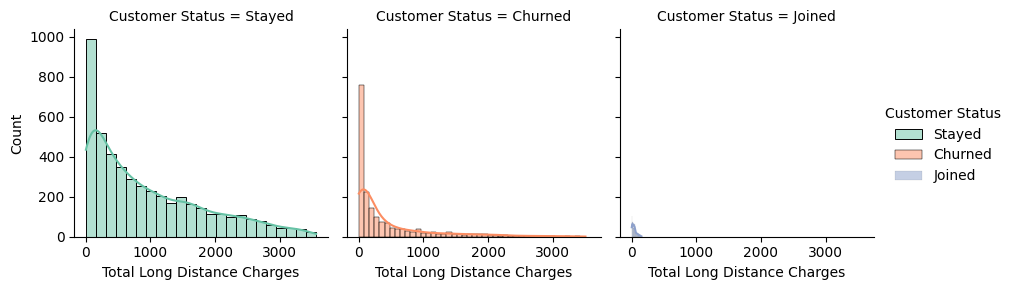

In [63]:
makegraph('Total Long Distance Charges', True)

**Observation:** The long distance charges were 0 for all the groups mostly, but the customers who stayed payed more for long distance charge than those who churned

##### Analysis by Total Revenue

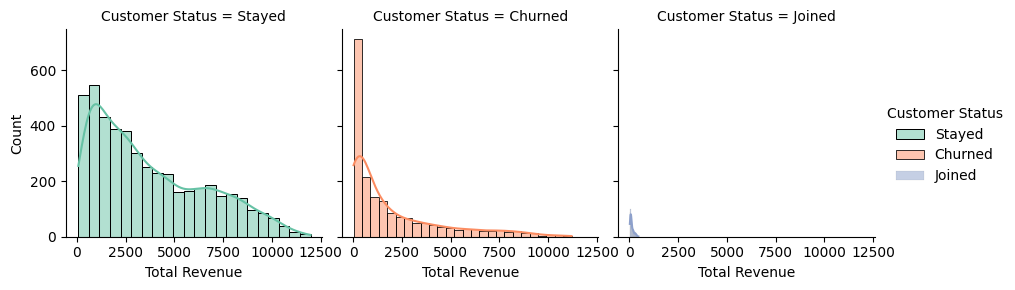

In [64]:
makegraph('Total Revenue', True)

**Observation:** Customers who stayed had generated maximum Revenue than other groups.

##### Defining Correlations among the Numerical Variables

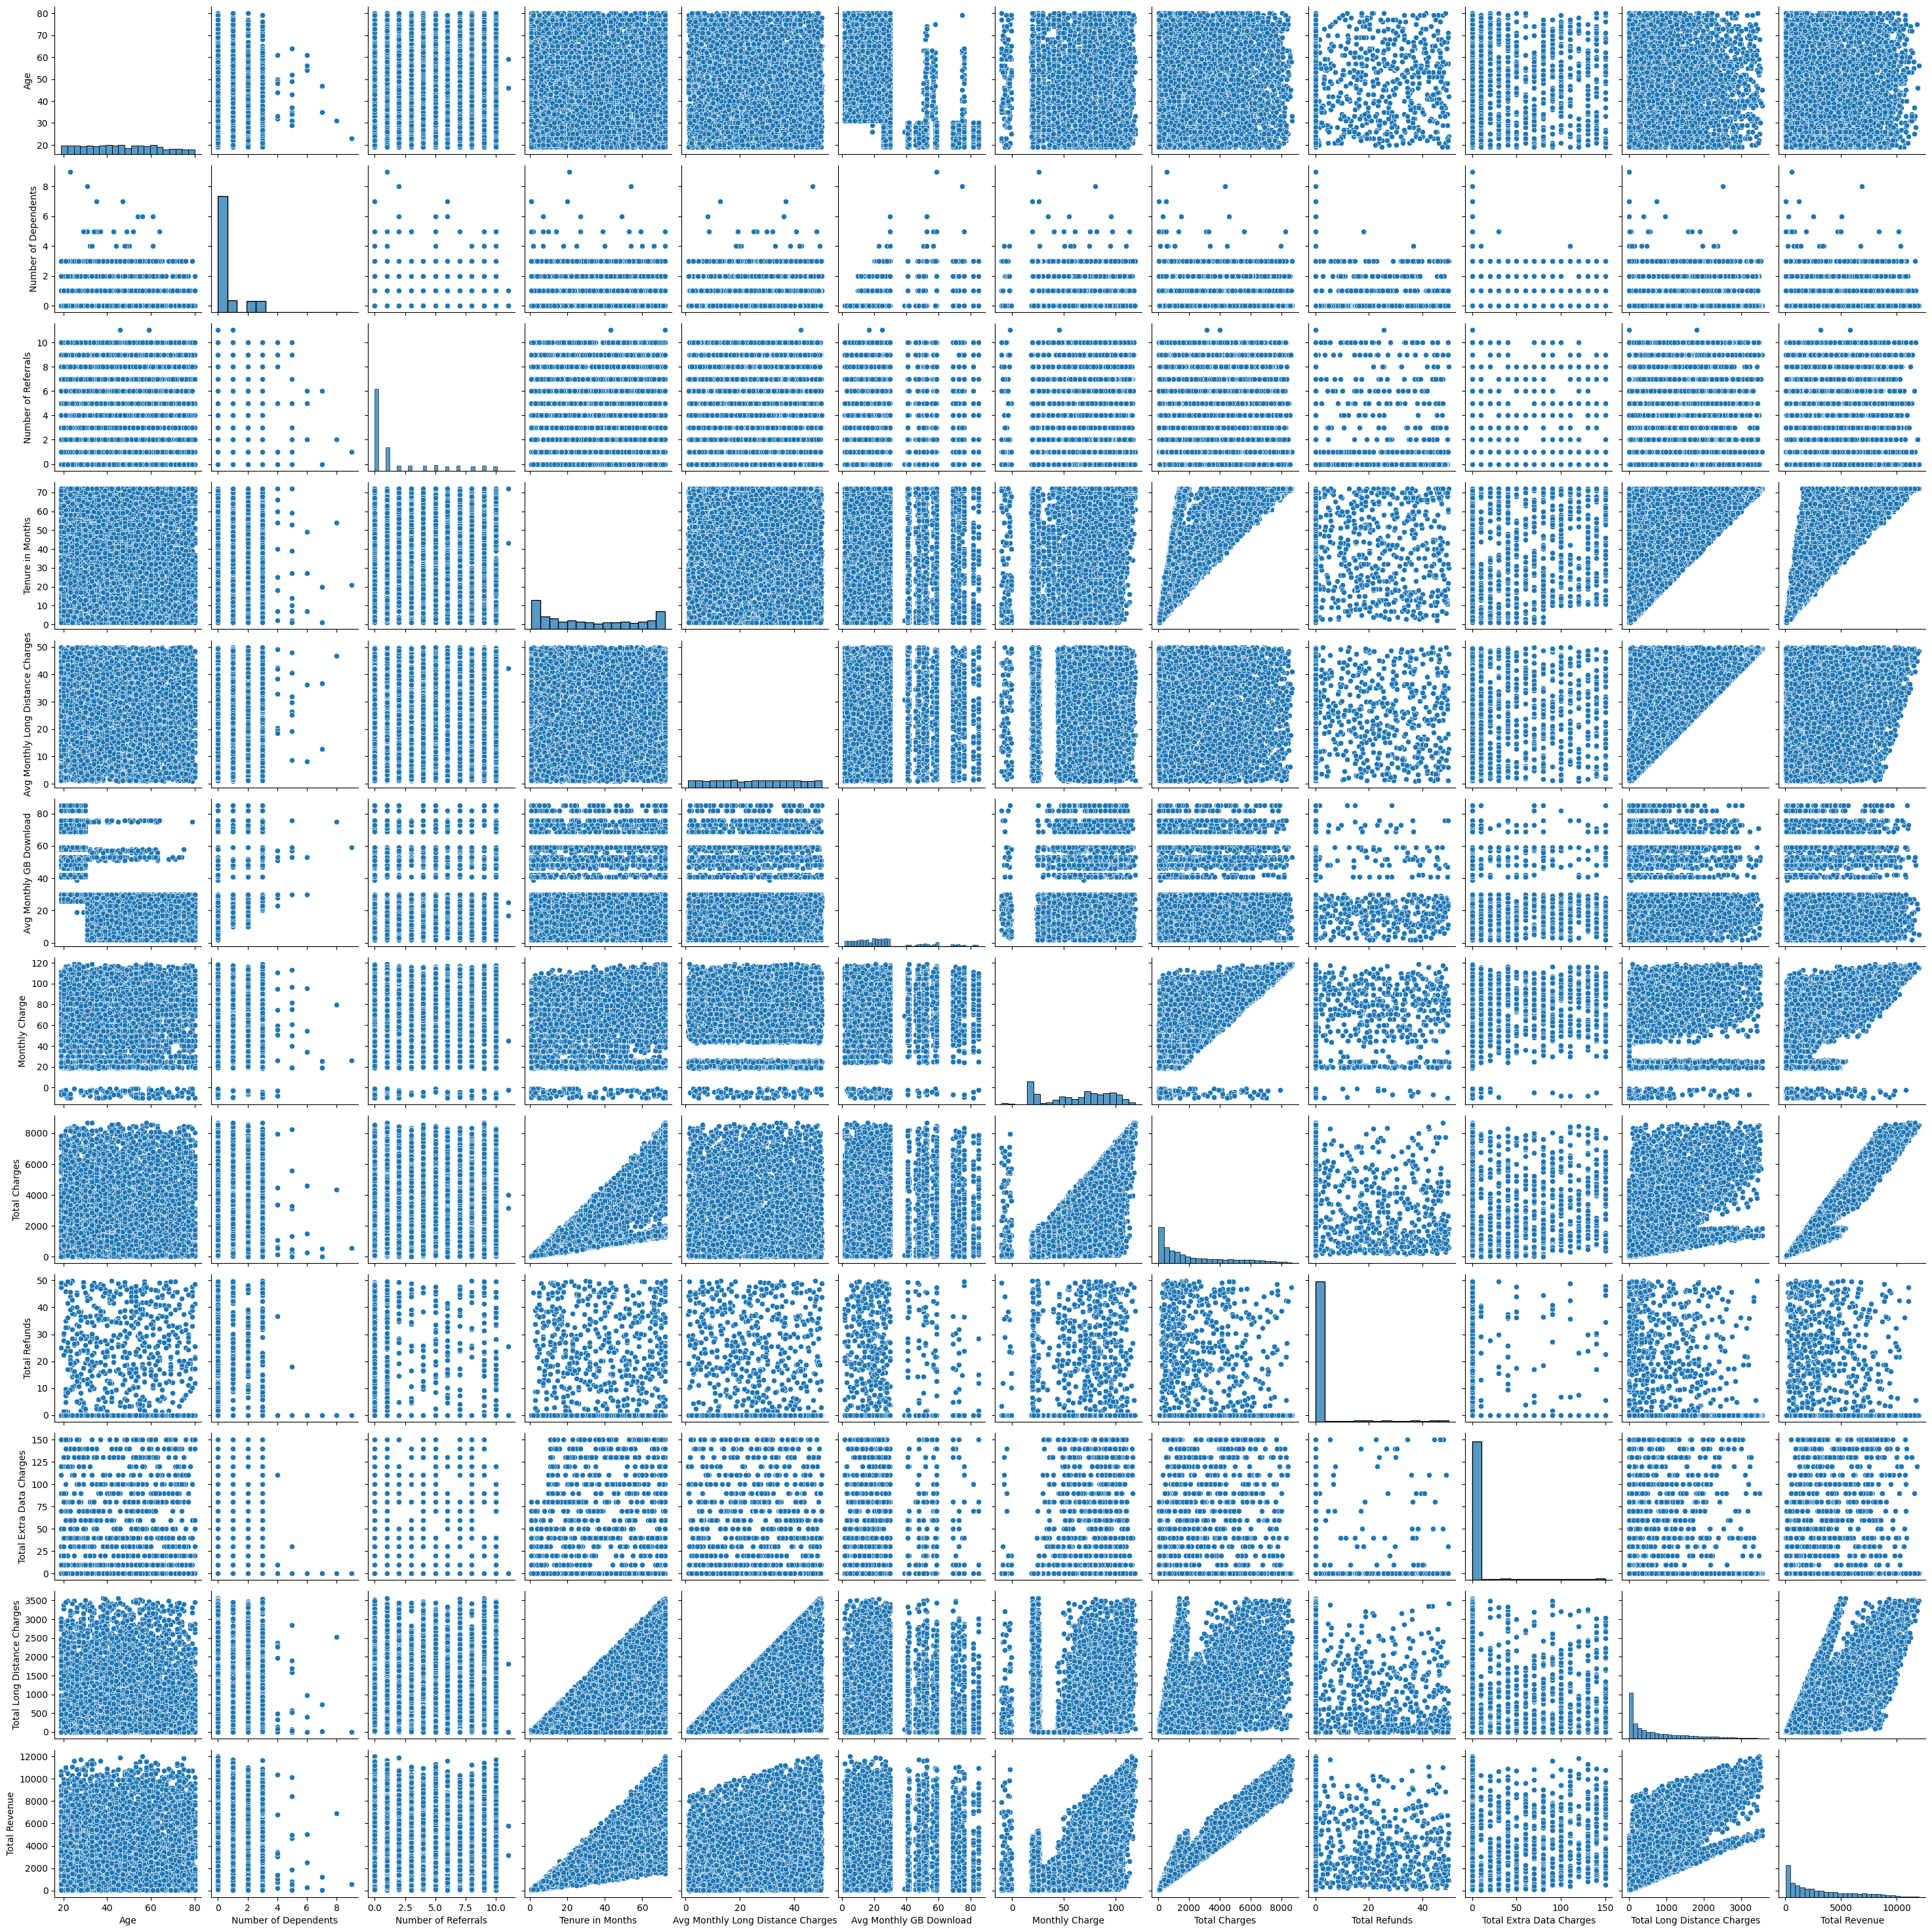

In [65]:
sns.pairplot(numerical)

In [66]:
numerical.corr()

Age  Number of Dependents  \
Age                                1.000000             -0.119000   
Number of Dependents              -0.119000              1.000000   
Number of Referrals               -0.025141              0.278003   
Tenure in Months                   0.009927              0.108237   
Avg Monthly Long Distance Charges -0.020010             -0.002898   
Avg Monthly GB Download           -0.566518              0.300802   
Monthly Charge                     0.134511             -0.125649   
Total Charges                      0.059684              0.022535   
Total Refunds                      0.024168              0.014023   
Total Extra Data Charges           0.025036             -0.014436   
Total Long Distance Charges        0.003065              0.068966   
Total Revenue                      0.048265              0.038038   

                                   Number of Referrals  Tenure in Months  \
Age                                          -0.025141          0.009927   
Number of Dependents                          0.278003          0.108237   
Number of Referrals                           1.000000          0.326975   
Tenure in Months                              0.326975          1.000000   
Avg Monthly Long Distance Charges             0.001800          0.012713   
Avg Monthly GB Download                       0.080243          0.038173   
Monthly Charge                                0.026301          0.239065   
Total Charges                                 0.250378          0.826074   
Total Refunds                                 0.024756          0.059021   
Total Extra Data Charges                      0.000350          0.082266   
Total Long Distance Charges                   0.216190          0.674149   
Total Revenue                                 0.261853          0.853146   

                                   Avg Monthly Long Distance Charges  \
Age                                                        -0.020010   
Number of Dependents                                       -0.002898   
Number of Referrals                                         0.001800   
Tenure in Months                                            0.012713   
Avg Monthly Long Distance Charges                           1.000000   
Avg Monthly GB Download                                     0.019047   
Monthly Charge                                              0.019149   
Total Charges                                               0.016946   
Total Refunds                                              -0.026072   
Total Extra Data Charges                                    0.021162   
Total Long Distance Charges                                 0.548759   
Total Revenue                                               0.173072   

                                   Avg Monthly GB Download  Monthly Charge  \
Age                                              -0.566518        0.134511   
Number of Dependents                              0.300802       -0.125649   
Number of Referrals                               0.080243        0.026301   
Tenure in Months                                  0.038173        0.239065   
Avg Monthly Long Distance Charges                 0.019047        0.019149   
Avg Monthly GB Download                           1.000000       -0.017283   
Monthly Charge                                   -0.017283        1.000000   
Total Charges                                     0.031957        0.622810   
Total Refunds                                    -0.011000        0.023963   
Total Extra Data Charges                          0.015451        0.121238   
Total Long Distance Charges                       0.024101        0.235685   
Total Revenue                                     0.031922        0.563249   

                                   Total Charges  Total Refunds  \
Age                                     0.059684       0.024168   
Number of Dependents                    0.022535       0.014023   


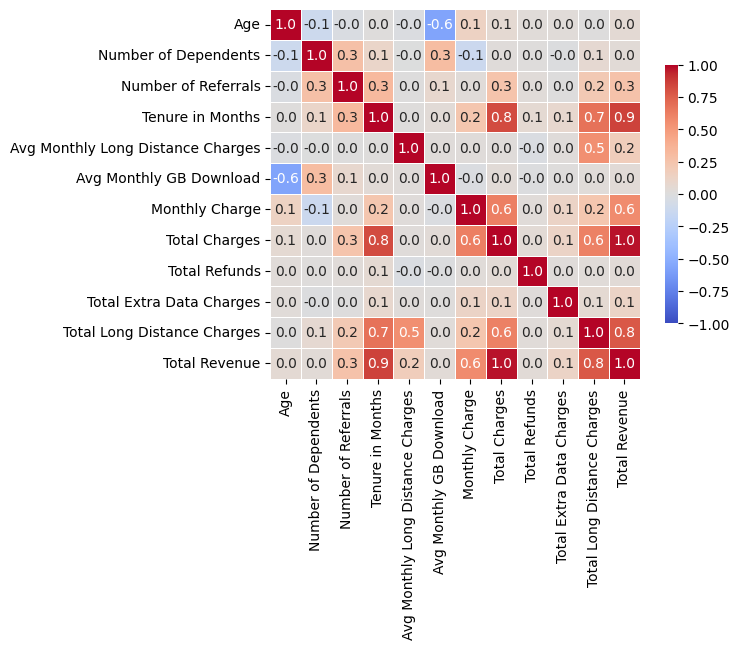

In [67]:
sns.heatmap(numerical.corr(), cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidth=.5, cbar_kws={'shrink': .7},
            annot=True, fmt='.1f');

**Observation:** <br>
From the pairwise scatter diagram, we observe that following variables show a positive correlation (these variables are inter-correlated):
- Tenure in Month
- Total Charges
- Total Long Distance Charges
- Total Revenue
- Monthly Charges

**Fact to keep in mind in the Modelling Phase:**
1. There are empty cells in the dataset.
2. The response variable 'Customer Status' is an imbalanced Classification problem (Stayed - 67%, Churned - 26%, Joined - 6.45%).
3. The explanatory variables - tenure in months, total charges, total long distance charges, total revenue, monthly charges tend to show correlation among each other.